In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
b_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
X = b_cancer.data
Y = b_cancer.target

In [4]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [5]:
df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
df["class"] = b_cancer.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df["class"].value_counts()

1    357
0    212
Name: class, dtype: int64

In [8]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("class", axis = 1)
Y = df["class"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size= 0.1 , stratify= Y, random_state=1)

In [13]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(512, 30) (57, 30) (512,) (57,)


In [14]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

0.6274165202108963 0.626953125 0.631578947368421


# Binarised the data 
As MP neuron only take binary data

In [15]:
X_train_binarised = X_train.apply(pd.cut, bins = 2, labels=[1,0])

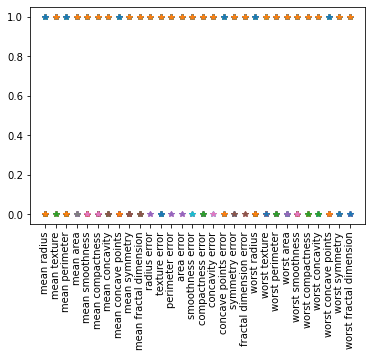

In [16]:
plt.plot(X_train_binarised.T, "*")
plt.xticks(rotation="vertical")
plt.show()

In [17]:
X_test_binarised = X_test.apply(pd.cut, bins = 2, labels=[1,0])

In [18]:
X_test_binarised = X_test_binarised.values
X_train_binarised = X_train_binarised.values

In [19]:
type(X_test_binarised)

numpy.ndarray

In [20]:
for b in range(X_train_binarised.shape[1]+1):
#     b = -1/
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_train_binarised, Y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows+= y_pred == y
    print("b: ",b, "Accurate rows: ",accurate_rows, "Accuracy train (%): ", accurate_rows/X_train.shape[0])
    

b:  0 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  1 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  2 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  3 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  4 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  5 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  6 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  7 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  8 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  9 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  10 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  11 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  12 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  13 Accurate rows:  321 Accuracy train (%):  0.626953125
b:  14 Accurate rows:  323 Accuracy train (%):  0.630859375
b:  15 Accurate rows:  324 Accuracy train (%):  0.6328125
b:  16 Accurate rows:  329 Accuracy train (%):  0.64

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
b = 28
y_pred_test = []
for x in X_test_binarised:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)
accuracy = accuracy_score(Y_test, y_pred_test)
print("b: ",b, "Accurate rows: ",accurate_rows, "Accuracy train (%): ", accurate_rows/X_train.shape[0])


b:  28 Accurate rows:  389 Accuracy train (%):  0.759765625


# Standard class for MP Neuron

In [23]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
        
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.asarray(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
            
        best_b = max(accuracy, key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b is ', best_b)
        print('Highest accuracy is ', accuracy[best_b])

In [24]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train_binarised, Y_train)

Optimal value of b is  28
Highest accuracy is  0.849609375


In [25]:
Y_test_pred = mp_neuron.predict(X_test_binarised)
accuracy_test = accuracy_score(Y_test_pred, Y_test)
print(accuracy_test)

0.7894736842105263


<!-- END  -->